In [1]:
!nvidia-smi

/usr/bin/zsh: /home/dimask/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
Thu Mar 16 12:13:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.05    Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:04:00.0  On |                  N/A |
|  0%   41C    P8    39W / 420W |    845MiB / 24576MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+------------------

<h3>2.a Create Label Map</h3>
labelmap index for labels must as same when we create in Image-Studio

In [5]:
import os
LABEL_MAP_NAME = 'label_map.pbtxt'

pathslabelmap = {
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    }
fileslabelmap = {
    'LABELMAP': os.path.join(pathslabelmap['ANNOTATION_PATH'], LABEL_MAP_NAME),
    }

for path in pathslabelmap.values():
    if not os.path.exists(path):
        !mkdir -p {path}

In [4]:
labels = [{'name':'orang', 'id':1}, {'name':'motor', 'id':2}, {'name':'mobil', 'id':3}, {'name':'helm', 'id':4}, {'name':'Truk', 'id':5}]

with open(fileslabelmap['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

<h3>2.b How to read result.json ? </h3>




Each COCO object detection aanotation have a category id. The categories field of the annotation structure stores the mapping of category 'id' to category and supercategory names. when you use image-studio app and exported the project as COCO you will get some zip file that cointain result.json and image export that file into dataset workspace directory.

you can use of both or one of this library Pylabel and Pycocotools for read the reslut.json

In [ ]:
!pip install scikit-image
!pip install pylabel

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
from pylabel import importer
from pycocotools.coco import COCO


<h3> pylabel </h3>

In [127]:
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = ""
path_to_annotations = './Tensorflow/workspace/images/train/result.json'
#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images)
dataset.df.head(10)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,749.681195,555.377102,...,[],0,,,,3,motor,,,1
1,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,856.975615,563.868027,...,[],0,,,,3,motor,,,1
2,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,680.209987,568.499441,...,[],0,,,,3,motor,,,1
3,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,647.018188,567.727539,...,[],0,,,,3,motor,,,1
4,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,606.879269,560.394467,...,[],0,,,,4,orang,,,1
5,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,400.828160,533.896172,...,[],0,,,,2,mobil,,,1
6,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,154.803170,574.248890,...,[],0,,,,3,motor,,,1
7,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,247.312652,544.164505,...,[],0,,,,3,motor,,,1
8,,b849e1da-IMG_2836.JPG,,0,1344,1008,,,767.421239,553.904773,...,[],0,,,,1,helm,,,1


In [121]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes of your own images:{dataset.analyze.classes}")
print(f"Class counts for each Class:\n{dataset.analyze.class_counts}")

Number of images: 84
Number of classes: 5
Classes:['Truk', 'helm', 'mobil', 'motor', 'orang']
Class counts:
motor    231
mobil    100
helm      68
Truk      16
orang      7
Name: cat_name, dtype: int64


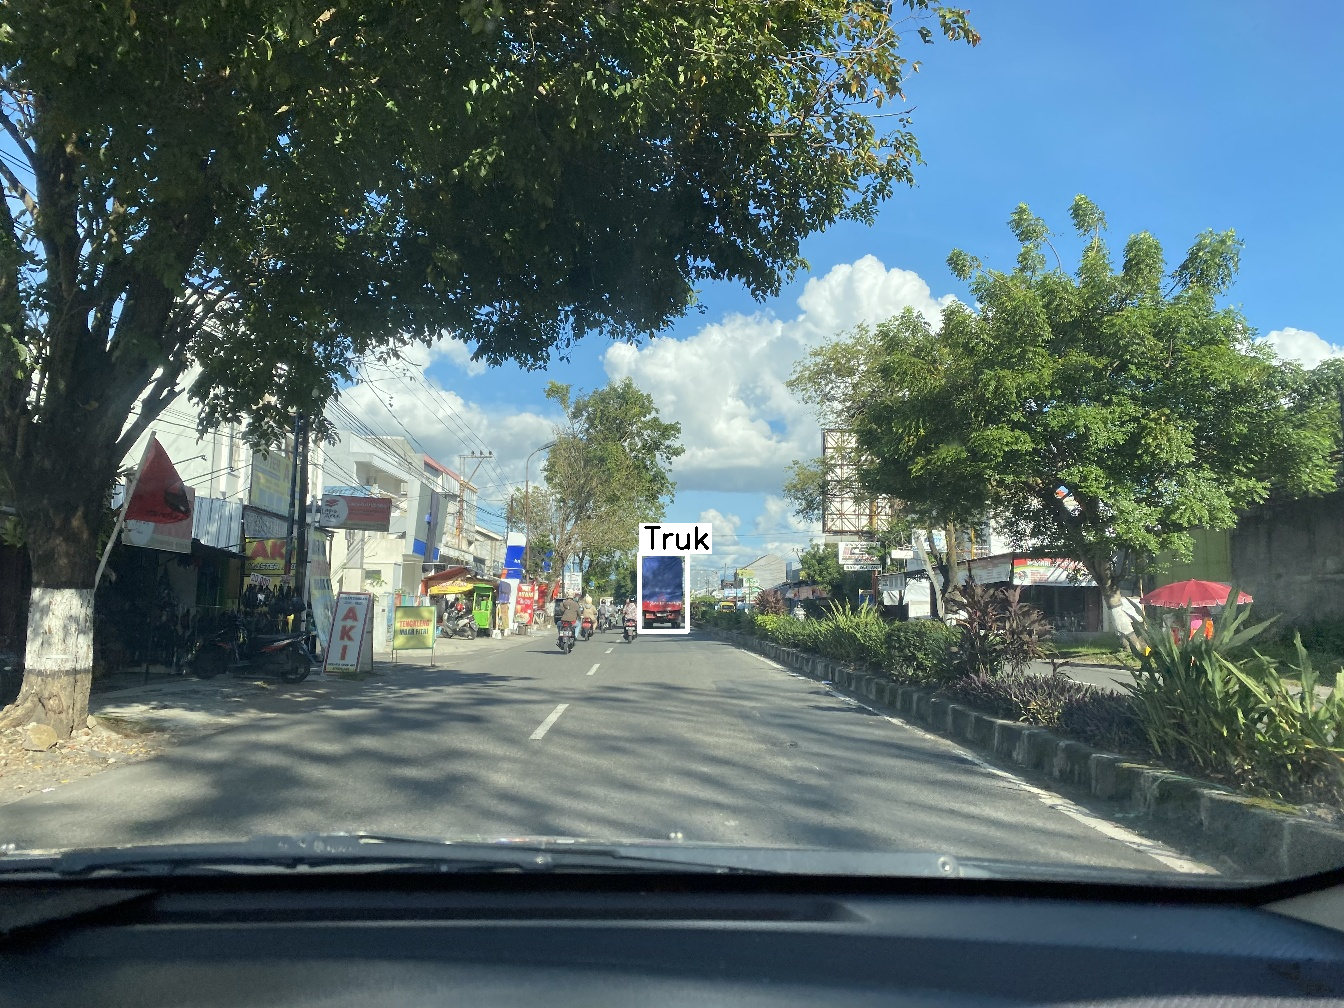

In [119]:
# show one of images with bbox form annotation 
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(5))

<h3> pycocotools </h3>


In [ ]:
coco=COCO('./Tensorflow/workspace/images/train/result.json') #define where is your .json file 

In [ ]:
imgIds = coco.getImgIds()
print("Total images: {}".format(len(imgIds)))

rand=np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[rand])[0] #get random image from directory images
print("Image example:")
print(img)

annIds=coco.getAnnIds()
print("\nTotal annotations: {}".format(len(annIds))) #count num of annotations 

ann=coco.loadAnns(coco.getAnnIds(imgIds=img['id']))
print("Annotation example:")
print(ann[0])

cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms))) #show classes 

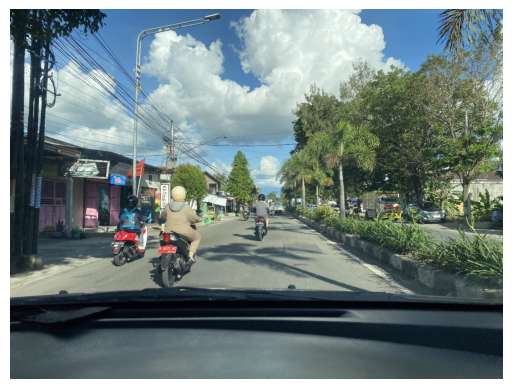

In [131]:
# Display a random image for your custom image dataset
im_folder = './Tensorflow/workspace/images/train/'

img = images[np.random.randint(0, len(imgIds))]
im = cv2.imread(im_folder + img['file_name'])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im), plt.axis('off');

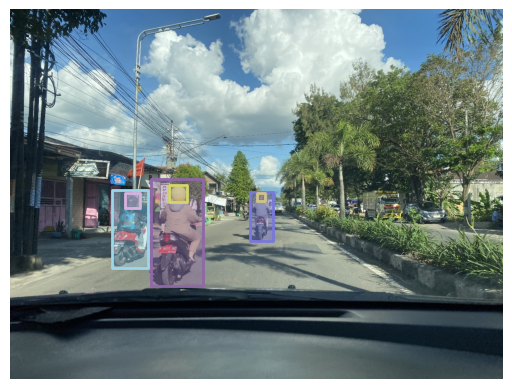

In [132]:
# Load and display instance annotations
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [133]:
# Show bbox labels
[{nms[annot['category_id']]: annot['bbox']} for annot in anns]


[{'motor': [383.39368421052626,
   461.2042105263158,
   141.4736842105263,
   292.8505263157895]},
 {'motor': [655.0231578947369, 497.9873684210526, 62.248421052631585, 134.4]},
 {'motor': [277.2884210526316,
   490.91368421052636,
   97.61684210526317,
   215.04000000000008]},
 {'helm': [434.2192936945417,
   477.9234682328993,
   49.175864383087294,
   47.5366689036511]},
 {'helm': [312.3660095408195,
   500.42142618816183,
   41.999056775245634,
   41.453614479463255]},
 {'helm': [673.4488093487754,
   501.5123107797267,
   21.817691831296457,
   21.81769183129646]}]

In [129]:
anns[0]

{'id': 356,
 'image_id': 63,
 'category_id': 2,
 'segmentation': [],
 'bbox': [392.8933079883281,
  571.180786603409,
  206.90535327062088,
  188.75576087846107],
 'ignore': 0,
 'iscrowd': 0,
 'area': 39054.57738642283}

 <h3>2.c Create TFrecord Coco Dataset </h3>


by using create_coco_tf_record.py file from directory Tensorflow Model that have been download in Section 1 you will use this file for create tfrecord aslo you need to edit some of the code so you can have the tfrecord file. <br>

In [6]:
TF_RECORD_SCRIPT_NAME = 'create_coco_tf_record.py'
COCO_RESULT_NAME = 'result.json'


pathcoco = { 
    'TRAIN_PATH': os.path.join('Tensorflow','workspace','coco'),
    'TFRECORD_PATH': os.path.join('Tensorflow','workspace','coco','TFrecord'),
    'COCO_SCRIPT_PATH' : os.path.join('Tensorflow','workspace','coco','Script'),
    'COCO_CREATE_PY_FILE' : os.path.join('Tensorflow','models','research', 'object_detection','dataset_tools', TF_RECORD_SCRIPT_NAME),
    }

datasetdir = {
    'PATH_IMAGE_ANOTATION': os.path.join('Tensorflow','workspace', 'images')
}

dataset = {
    'TRAIN_DIR' : os.path.join(datasetdir['PATH_IMAGE_ANOTATION'],'train'),
    'TEST_DIR' : os.path.join(datasetdir['PATH_IMAGE_ANOTATION'],'test'),
    'VAL_DIR' : os.path.join(datasetdir['PATH_IMAGE_ANOTATION'],'val')
}

for path in pathcoco.values():
    if not os.path.exists(path):
        !mkdir -p {path}
for path in datasetdir.values():
    if not os.path.exists(path):
        !mkdir -p {path}
for path in dataset.values():
    if not os.path.exists(path):
        !mkdir -p {path}

In [1]:
!cp {os.path.join(pathcoco['COCO_CREATE_PY_FILE'])} {os.path.join(pathcoco['COCO_SCRIPT_PATH'])}

/usr/bin/zsh: /home/dimask/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
zsh:1: no matches found: {os.path.join(pathcoco[COCO_CREATE_PY_FILE])}


<blockquote> 
<h4> Notice !</h4>
Open create_coco_tf_record.py inside Tensorflow/workspace/coco/Script/create_coco_tf_record.py and EDIT for num_shards=100 to num_shards=1

</blockquote>


<blockquote>
<h4> Notice !! </h4>
<blockquote>
</blockquote>
before you create tf record make sure you export the dataset into this folder 'Tensorflow/workspace/images' <br>
</blockquote>
<br>
<blockquote>
<h4> Error No such file or directory </h4>

<p> /images\*****.JPG*****; No such file or directory <br>
find and open result.json inside directory dataset and delete all '/images\'<br>
</p>
</blockquote>



In [13]:
print(datasetdir['PATH_IMAGE_ANOTATION'])

Tensorflow/workspace/images


In [7]:
command = 'python {} --logtostderr --train_image_dir={} --val_image_dir={}\
    --test_image_dir={} --train_annotations_file={} --val_annotations_file={}\
    --testdev_annotations_file={} --output_dir={}  --num_shards=1'.format(os.path.join(pathcoco['COCO_SCRIPT_PATH'], TF_RECORD_SCRIPT_NAME),\
                                      os.path.join(datasetdir['PATH_IMAGE_ANOTATION'], 'train'),os.path.join(datasetdir['PATH_IMAGE_ANOTATION'], 'val'),os.path.join(datasetdir['PATH_IMAGE_ANOTATION'], 'test'),\
                                         os.path.join(datasetdir['PATH_IMAGE_ANOTATION'], 'train',COCO_RESULT_NAME), os.path.join(datasetdir['PATH_IMAGE_ANOTATION'], 'val',COCO_RESULT_NAME), os.path.join(datasetdir['PATH_IMAGE_ANOTATION'], 'test',COCO_RESULT_NAME),\
                                            pathcoco['TFRECORD_PATH'] )

In [17]:
!{command}

/usr/bin/zsh: /home/dimask/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
2023-03-16 18:56:03.373251: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/dimask/miniconda3/lib/:/home/dimask/miniconda3/envs/tfod3/lib/
2023-03-16 18:56:03.376224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/dimask/miniconda3/lib/:/home/dimask/miniconda3/envs/tfod3/lib/
2023-03-16 18:56:03.376308: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the miss

<blockquote> 
<h3> Rename TFrecord file </h3>

after creating record file you must rename that file, because create_coco_tf_record.py have a num_shards function that make .record file into 
several files <br>
<blockquote> 
coco_testdev.record-0000-0f-0001 to coco_testdev.record <br>
coco_train.record-0000-0f-0001 to coco_train.record <br>
coco_val.record-0000-0f-0001 to coco_val.record<br>
</blockquote> 
</blockquote>

In [8]:
!ls {pathcoco['TFRECORD_PATH']}

/usr/bin/zsh: /home/dimask/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
coco_testdev.record  coco_train.record	coco_val.record
